In [1]:
#This project tests the momentum strategy amongst 26 biggest crypto coins. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client
from pandas.tseries.offsets import BusinessDay
from pandas.tseries.offsets import BusinessHour
import yfinance as yf    
from datetime import datetime

In [2]:
client = Client()
#getting crypto tickers from Yahoo. Let's do some webscrapping 
tickers = ['BTC', 'ETH', 'BNB', 'XRP', 'DOT', 'DOGE', 'SHIB', 'LTC', 'UNI', 'LINK', 'MATIC', 'BCH', 'TRX', 'MANA', 'ATOM', 'ETC', 'XTZ', 'XMR', 'GRT', 'EOS', 'SAND', 'AAVE', 'LRC', 'NEO', 'ZEC']
#apparently for some reason Yahoofinance has no ticker as BTC, it only has BTC-USD, so let's add USD to all of the tickers above
good_tickers_list=[]
for x in tickers:
    good_tickers = x+str('-USD')
    good_tickers_list.append(good_tickers)
#now let's create our dataframe
#concatenated_dataframes = pd.concat([dataframe1, dataframe2], axis=1)

#I will create an array to fill it in with the data of Crypto Close Prices
list_of_close=[]

#Here I just put all the arrays of prices I have in one beautiful dataframe
for x in range(len(good_tickers_list)):
    list_of_close.append(yf.download(good_tickers_list[x], start= datetime(2021,7,1), end = datetime(2022,5,1),interval='1h')["Close"])
df=pd.DataFrame(list_of_close, index=tickers).transpose()
ret_df=df.pct_change()
logret_df = np.log(ret_df+1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [16]:
# Momentum Function
#In this fundction we define K by defining Business hours n
def momentum(window, number, date):
    ret_wd = logret_df.rolling(window).sum().loc[date]
    top_performers = ret_wd.nlargest(number)
    bottom_performers = ret_wd.nsmallest(number)
    winners = ret_df.loc[top_performers.name + BusinessHour(n =1), top_performers.index].mean()
    losers = ret_df.loc[bottom_performers.name + BusinessHour(n = 1), bottom_performers.index].mean()
    pf_ret = winners-losers
    return pf_ret, top_performers.mean() - bottom_performers.mean()

In [17]:
profits = []
#we iterate this function through different dates 
for date in logret_df.index[9:-100]:
        profits.append(momentum(24, 3, date))

#then we create a dataframe from this data
profits = pd.DataFrame(profits)
#clean up and replace datapoints that do not make sense. 
profits.replace([np.inf, -np.inf], np.nan, inplace=True)
#define columns for the dataframe
profits.columns = ['Momentum_Returns', 'Previous_Period_Returns']
import statsmodels.formula.api as smf
#make a regression
regression = "Momentum_Returns~Previous_Period_Returns"
regression_output = smf.ols(regression, profits).fit()
print(regression_output.summary(alpha=0.1))
print(regression_output.summary(alpha=0.05))
print(regression_output.summary(alpha=0.01))

                            OLS Regression Results                            
Dep. Variable:       Momentum_Returns   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     359.3
Date:                Mon, 16 May 2022   Prob (F-statistic):           3.33e-78
Time:                        16:27:55   Log-Likelihood:                 21120.
No. Observations:                7068   AIC:                        -4.224e+04
Df Residuals:                    7066   BIC:                        -4.222e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|       [0.05       0.95]
-------------------------------------------------------------------------------------------
Intercept                 

profits

In [34]:
#Sharpe Ratio 
Expected_Portfolio_Ret = profits['Momentum_Returns'].mean()*8760#multiply by the number of hours in one year. 
Risk_Free_rate = 2
St_dev_of_portfolio = profits['Momentum_Returns'].std()*8760
Sharpe_ratio = (Expected_Portfolio_Ret - Risk_Free_rate) / St_dev_of_portfolio
Sharpe_ratio
St_dev_of_portfolio

109.47549982682908

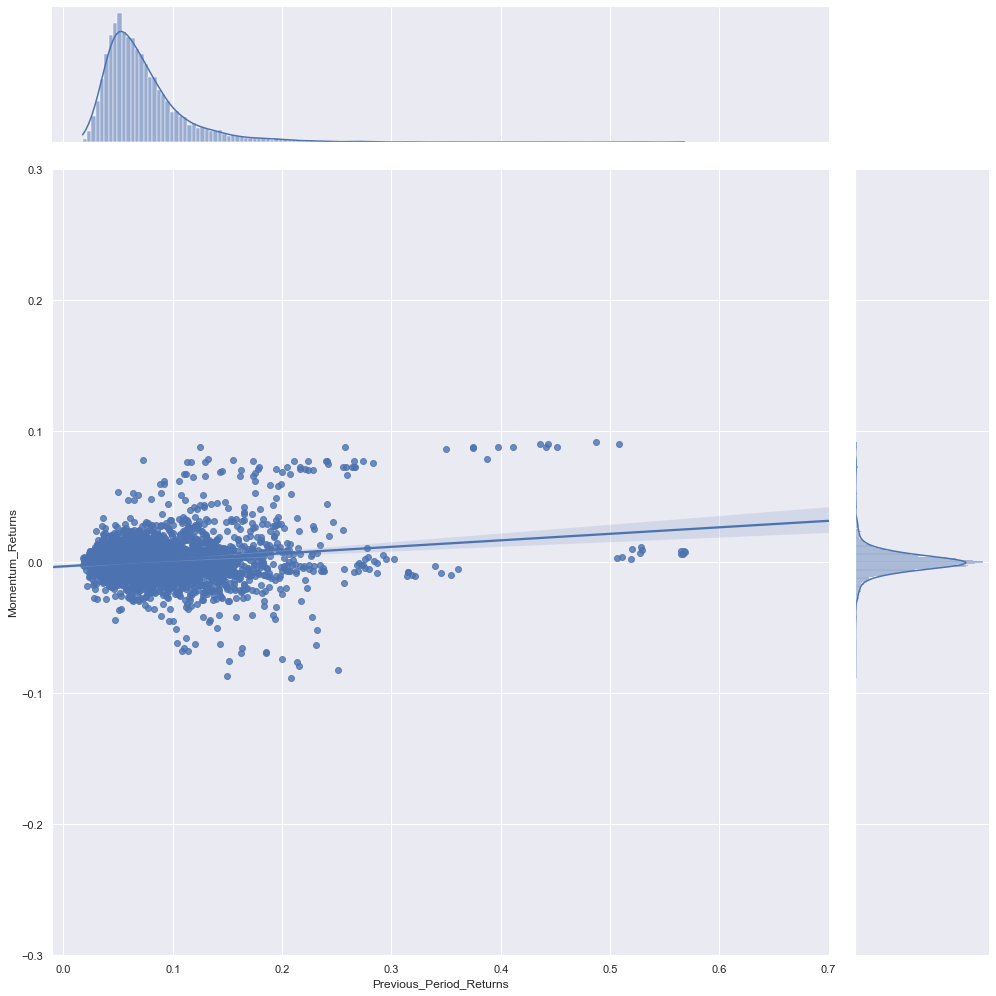

In [80]:
#Plot The Regression Line
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="Previous_Period_Returns", y="Momentum_Returns", data=profits,
                  kind="reg", truncate=False,
                  xlim=(-0.010, 0.7), ylim=(-0.3, 0.3),
                  color="b", height=14)

In [32]:














#_________________________CODE STOPS HERE_____________________________________________________________________

















#CODE I HAVE NOT USED 

#RSI Calculations
new = df.diff()
up = df.diff().clip(lower=0)
bottom = df.diff().clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_bottom = bottom.ewm(com=13, adjust=False).mean()
rs = abs(ema_up/ema_bottom)
RSI = 100 - (100/(1+rs))

In [33]:
new1 = df.std()
#calculating minimum varience portfolio 
new1

BTC      8372.728873
ETH       692.467962
BNB        87.982247
XRP         0.195524
DOT         3.940499
DOGE        0.055378
SHIB        0.000014
LTC        37.885083
UNI         0.000036
LINK        6.048772
MATIC       0.409739
BCH       131.893635
TRX         0.017488
MANA        1.172123
ATOM        5.038114
ETC        12.361968
XTZ         1.427041
XMR        41.894834
GRT         0.067731
EOS         1.068160
SAND        1.885727
AAVE       82.753703
LRC         0.796004
NEO        11.893718
ZEC        33.809430
dtype: float64

In [4]:
#calculating the return vector and the covariance matrix

cov = ret_df.cov()*252
r = np.array(((1+ret_df).prod())**(252/len(ret_df)) - 1)
e = np.ones(len(r))



icov = np.linalg.inv(cov)
h = np.matmul(e, icov)
g = np.matmul(r, icov)
a = np.sum(e*h)
b = np.sum(e*g)
c = np.sum(r*g)
d = a*c - b**2

mvp = h/a
mvp_return = b/a
mvp_risk = 1/a**(1/2)

target_return = 0.12
if target_return < mvp_return:
    optimal_portfolio = mvp
    optimal_return = mvp_return
    optimal_risk = mvp_risk
else:
    l = (c - b*target_return)/d
    m = (a*target_return - b)/d
    optimal_portfolio = l*h + m*g
    optimal_return = np.sum(optimal_portfolio*r)
    optimal_risk = ((a*optimal_return**2 - 2*b*optimal_return + c)/d)**(1/2)

In [67]:
optimal_portfolio

array([ 1.22711472,  1.18697907,  0.7106731 , -0.01168529, -0.65920521,
       -0.22985142,  0.16823745, -0.27491157,  0.00474946, -0.42334293,
       -0.14025644, -0.28261654,  0.31477544, -0.01292518,  0.02182359,
       -0.2708071 ,  0.01461123,  0.18595809, -0.05005709, -0.304803  ,
        0.29892036, -0.30429275,  0.19116163, -0.42459522,  0.06434561])

In [175]:
past_returns(7, 5, "2021-1-1")[0]

DOT     0.465689
DOGE    0.215696
ATOM    0.177348
BTC     0.174738
ETH     0.153542
Name: 2021-01-01 00:00:00, dtype: float64

In [95]:
d = {'Standard Deviation':new1, 'Weight':optimal_portfolio}
df = pd.DataFrame(data=d)

In [96]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.transpose())

,BTC,ETH,BNB,XRP,DOT,DOGE,SHIB,LTC,UNI,LINK,MATIC,BCH,TRX,MANA,ATOM,ETC,XTZ,XMR,GRT,EOS,SAND,AAVE,LRC,NEO,ZEC
Standard Deviation,8372.728873,692.467962,87.982247,0.195524,3.940499,0.055378,0.000014,37.885083,0.000036,6.048772,0.409739,131.893635,0.017488,1.172123,5.038114,12.361968,1.427041,41.894834,0.067731,1.068160,1.885727,82.753703,0.796004,11.893718,33.809430
Weight,1.227115,1.186979,0.710673,-0.011685,-0.659205,-0.229851,0.168237,-0.274912,0.004749,-0.423343,-0.140256,-0.282617,0.314775,-0.012925,0.021824,-0.270807,0.014611,0.185958,-0.050057,-0.304803,0.298920,-0.304293,0.191162,-0.424595,0.064346


In [35]:
momentum(12, 3, date)[0]

0.004519431359758445

1.0000000000000004

In [41]:
ret_df

,BTC,ETH,BNB,XRP,DOT,DOGE,SHIB,LTC,UNI,LINK,...,ETC,XTZ,XMR,GRT,EOS,SAND,AAVE,LRC,NEO,ZEC
2021-07-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01 05:00:00+00:00,0.000402,0.003342,-0.001274,0.002502,NaN,0.000037,NaN,0.001582,NaN,0.000458,...,-0.003244,0.000660,0.015039,NaN,0.000771,0.010705,0.009145,0.005610,-0.000354,0.002358
2021-07-01 06:00:00+00:00,-0.022310,-0.023873,-0.024487,-0.030081,NaN,-0.027505,NaN,-0.025988,NaN,-0.030571,...,-0.034651,-0.035528,-0.031597,NaN,-0.035081,-0.002268,-0.031715,-0.024638,-0.034370,-0.030781
2021-07-01 07:00:00+00:00,-0.004320,-0.012192,-0.003583,-0.004542,NaN,-0.000880,NaN,-0.003681,NaN,-0.010206,...,-0.011532,-0.001864,-0.012152,NaN,-0.013035,0.008563,-0.019962,-0.010733,-0.004558,-0.007821
2021-07-01 08:00:00+00:00,0.001460,-0.007073,0.004757,0.003310,NaN,0.069408,NaN,0.002153,NaN,-0.004003,...,-0.005843,-0.002414,0.002293,NaN,0.004486,-0.007272,0.003496,0.001721,0.000949,0.002190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30 23:00:00+00:00,-0.014550,-0.018942,-0.021397,-0.032630,-0.041789,-0.021200,-0.046866,-0.030169,-0.014550,-0.034104,...,-0.058586,-0.027834,-0.022636,0.0,-0.040202,-0.048245,-0.049208,-0.044103,-0.033560,-0.055964
2022-05-01 00:00:00+00:00,0.000427,0.002238,0.004246,-0.002361,0.012082,0.005678,0.001355,-0.003515,0.000427,-0.001167,...,0.011717,-0.004201,0.017006,0.0,0.008095,0.001150,-0.005789,0.003459,-0.009375,-0.003831
2022-05-01 01:00:00+00:00,0.005839,0.011802,0.007603,0.008456,0.013055,0.011999,0.009922,0.005650,0.005839,0.016201,...,0.012539,0.002810,0.014581,0.0,0.013690,0.008523,0.010894,0.017979,0.013417,0.036099
2022-05-01 02:00:00+00:00,-0.002963,-0.003716,-0.003986,-0.003395,-0.008518,-0.001128,0.000697,-0.003068,-0.002963,-0.005633,...,-0.001431,-0.003589,0.001407,0.0,-0.008522,-0.010219,-0.002819,-0.006774,-0.003634,-0.013683


In [36]:
RSI['BTC'].std()

13.028508611200902

In [83]:
    ret_wd = logret_df.rolling(12).sum().loc["2021-07-01 07:00:00+00:00"]
    top_performers = ret_wd.nlargest(5)

In [84]:
top_performers

Series([], Name: 2021-07-01 07:00:00+00:00, dtype: float64)

In [45]:
RSI_array = []


,BTC,ETH,BNB,XRP,DOT,DOGE,SHIB,LTC,UNI,LINK,...,ETC,XTZ,XMR,GRT,EOS,SAND,AAVE,LRC,NEO,ZEC
2021-07-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01 05:00:00+00:00,100.000000,100.000000,0.000000,100.000000,NaN,100.000000,NaN,100.000000,NaN,100.000000,...,0.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,0.000000,100.000000
2021-07-01 06:00:00+00:00,18.959206,64.458388,0.000000,51.888503,NaN,1.700958,NaN,44.131395,NaN,16.282036,...,0.000000,19.434880,85.906922,NaN,22.201180,98.379315,78.789154,74.640944,0.000000,49.843093
2021-07-01 07:00:00+00:00,16.270946,54.130223,0.000000,48.228890,NaN,1.646715,NaN,40.749263,NaN,12.604303,...,0.000000,18.617721,81.310722,NaN,17.072660,98.479284,69.161175,66.880556,0.000000,43.991554
2021-07-01 08:00:00+00:00,20.362766,49.259222,10.683243,50.932587,NaN,73.462038,NaN,43.468793,NaN,11.516808,...,0.000000,17.587988,81.509325,NaN,23.533503,93.177946,69.842287,67.458446,2.362105,45.892494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30 23:00:00+00:00,25.113406,27.876082,20.981349,24.564475,13.781309,22.750265,18.059060,23.266478,25.106674,16.354934,...,15.702795,23.718856,31.222182,29.611596,14.018949,13.714155,24.987572,16.022191,21.551570,16.826607
2022-05-01 00:00:00+00:00,25.871545,30.251667,25.664537,23.953280,21.362801,27.413255,18.899360,22.232203,25.865078,16.187507,...,21.869433,22.841133,39.019439,29.611596,19.241711,14.268140,24.154141,17.766146,20.010124,16.475986
2022-05-01 01:00:00+00:00,35.486617,41.261729,33.317710,30.596910,28.742302,36.223887,24.973075,27.769809,35.483611,27.303803,...,28.009420,24.836218,44.886702,29.611596,27.344612,18.450692,28.930462,26.355898,27.884543,31.007390
2022-05-01 02:00:00+00:00,33.124730,39.141651,31.474517,29.474098,26.942453,35.779149,25.399876,26.653459,33.121273,25.992077,...,27.738090,23.980758,45.440039,29.611596,25.599161,17.348525,28.426158,25.265730,27.096022,28.882252


In [7]:
#calculating the return vector and the covariance matrix to optimize returns

cov = ret_df.cov()*8750
r = np.array(((1+ret_df).prod())**(8760/len(ret_df)) - 1)
e = np.ones(len(r))



icov = np.linalg.inv(cov)
h = np.matmul(e, icov)
g = np.matmul(r, icov)
a = np.sum(e*h)
b = np.sum(e*g)
c = np.sum(r*g)
d = a*c - b**2

mvp = h/a
mvp_return = b/a
mvp_risk = 1/a**(1/2)

target_return = 0.12
if target_return < mvp_return:
    optimal_portfolio = mvp
    optimal_return = mvp_return
    optimal_risk = mvp_risk
else:
    l = (c - b*target_return)/d
    m = (a*target_return - b)/d
    optimal_portfolio = l*h + m*g
    optimal_return = np.sum(optimal_portfolio*r)
    optimal_risk = ((a*optimal_return**2 - 2*b*optimal_return + c)/d)**(1/2)

In [10]:
optimal_portfolio

array([ 0.7175528 ,  0.02647495,  0.23733502, -0.0204511 ,  0.03750667,
        0.01814948, -0.01322748, -0.09377195,  0.00231574, -0.18444986,
       -0.12566298,  0.23526467,  0.33052437, -0.01945217,  0.04522107,
       -0.09496667, -0.02680192,  0.0889235 ,  0.17883307, -0.03308464,
       -0.00420281, -0.11793095, -0.02452655, -0.12929359, -0.03027868])

In [19]:
optimal_risk

0.5012958107184526

In [18]:
profits.std()

Momentum_Returns           0.008270
Previous_Period_Returns    0.036612
dtype: float64